In [5]:
# "Columns in parcel.csv:", df1.columns.tolist()

# cols = df2.columns.tolist()


# df = pd.read_csv("parking.csv", names=cols)

# df.head()

In [11]:
# "Columns in parking.csv:", df2.columns.tolist()

In [13]:
# cols = ['X',
#   'Y',
#   'Id',
#   'Summary',
#   'Rating',
#   'Address',
#   'Description',
#   'Agency_Name',
#   'Request_type',
#   'Lat',
#   'Lng',
#   'Created_at_local',
#   'Acknowledged_at_local',
#   'Closed_at_local',
#   'Minutes_to_Acknowledge',
#   'Minutes_to_Close',
#   'Assignee_name',
#   'Category',
#   'Sla_in_hours',
#   'Report_Source',
#   'ObjectId']


# df = pd.read_csv("parking.csv", names=cols)
# df.head(15)


In [15]:
# df = pd.read_csv("parking.csv", names=cols)

# description_counts = df['Summary'].value_counts(normalize=True) * 100  


# plt.figure(figsize=(12, 6))
# description_counts.head(10).plot(kind='bar', color='skyblue')  
# plt.title("Ratio of Different Descriptions", fontsize=14)
# plt.xlabel("Summary", fontsize=12)
# plt.ylabel("Percentage (%)", fontsize=12)
# plt.xticks(rotation=45, ha='right')
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()




               X             Y  Parking_Region
0  -8.475021e+06  5.318123e+06              52
1  -8.474749e+06  5.317815e+06              32
2  -8.475021e+06  5.318123e+06              52
3  -8.474747e+06  5.317800e+06              32
4  -8.474747e+06  5.317800e+06              32
5  -8.475501e+06  5.318189e+06               6
6  -8.474761e+06  5.317786e+06              32
7  -8.475107e+06  5.318279e+06              52
8  -8.475107e+06  5.318279e+06              52
9  -8.474741e+06  5.317755e+06              32
10 -8.472483e+06  5.321340e+06              60
11 -8.475107e+06  5.318279e+06              52
12 -8.474757e+06  5.317727e+06              32
13 -8.472483e+06  5.321340e+06              60
14 -8.472483e+06  5.321340e+06              60


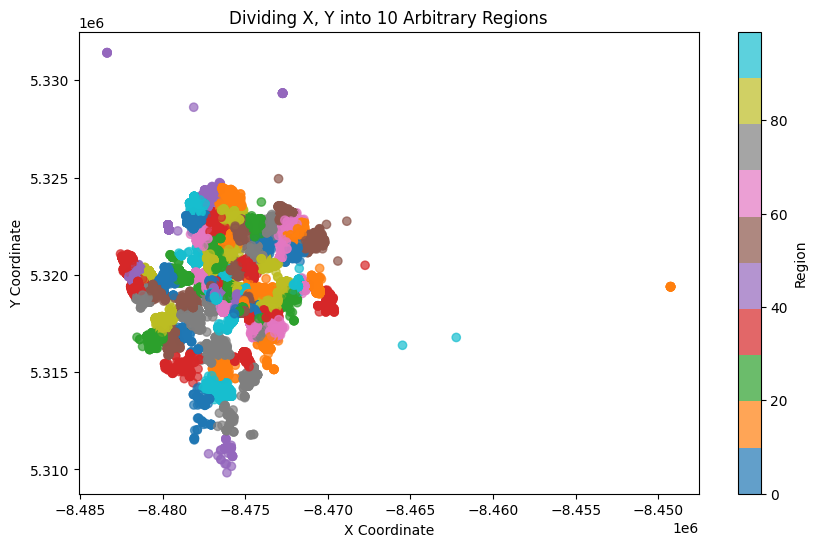

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv("parking.csv")



# Select only valid rows with non-null X and Y
df = df[['X', 'Y']].dropna().reset_index(drop=True)  # Drop NaNs and reset index

# Apply K-Means clustering to divide into 10 regions
kmeans = KMeans(n_clusters=50, random_state=42, n_init=50)
df["Parking_Region"] = kmeans.fit_predict(df[['X', 'Y']])  # Fit only on existing rows

# Visualize the regions

df.to_excel("cityline_with_class.xlsx", index=False)

# Display first few rows with Region column
print(df.head(15))


dj = pd.read_csv("parking.csv")

dj = dj[['X', 'Y']].dropna().reset_index(drop=True) 

dj["Parking_Region"] = kmeans.fit_predict(dj[['X', 'Y']])


plt.figure(figsize=(10, 6))
scatter = plt.scatter(df["X"], df["Y"], c=df["Parking_Region"], cmap="tab10", alpha=0.7)
plt.colorbar(scatter, label="Region")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Dividing X, Y into 10 Arbitrary Regions")
plt.show()







In [19]:

# Load the dataset
df = pd.read_csv("parking.csv")

# Select only valid rows with non-null X and Y
df = df[['X', 'Y', 'description']].dropna().reset_index(drop=True)  # Drop NaNs and reset index

# Apply K-Means clustering to divide into 10 regions
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
df["Region"] = kmeans.fit_predict(df[['X', 'Y']])  # Fit only on existing rows

# Group by region and find the most frequent description in each region
region_description = df.groupby('Region')['description'].agg(lambda x: x.value_counts().idxmax())

# Print out the highest description for each region
# print(region_description)

#/////////////////////////////////////////////////


# dj = pd.read_csv("parking.csv")

# dj = dj[['X', 'Y', 'description']].dropna().reset_index(drop=True)


# dj["Parking_Region"] = kmeans.fit_predict(dj[['X', 'Y']])


# region_description = dj.groupby('Region')['Description'].agg(lambda x: x.value_counts().idxmax())


Parking Violatino FILE 

Sorting Violations type common ratio at each region




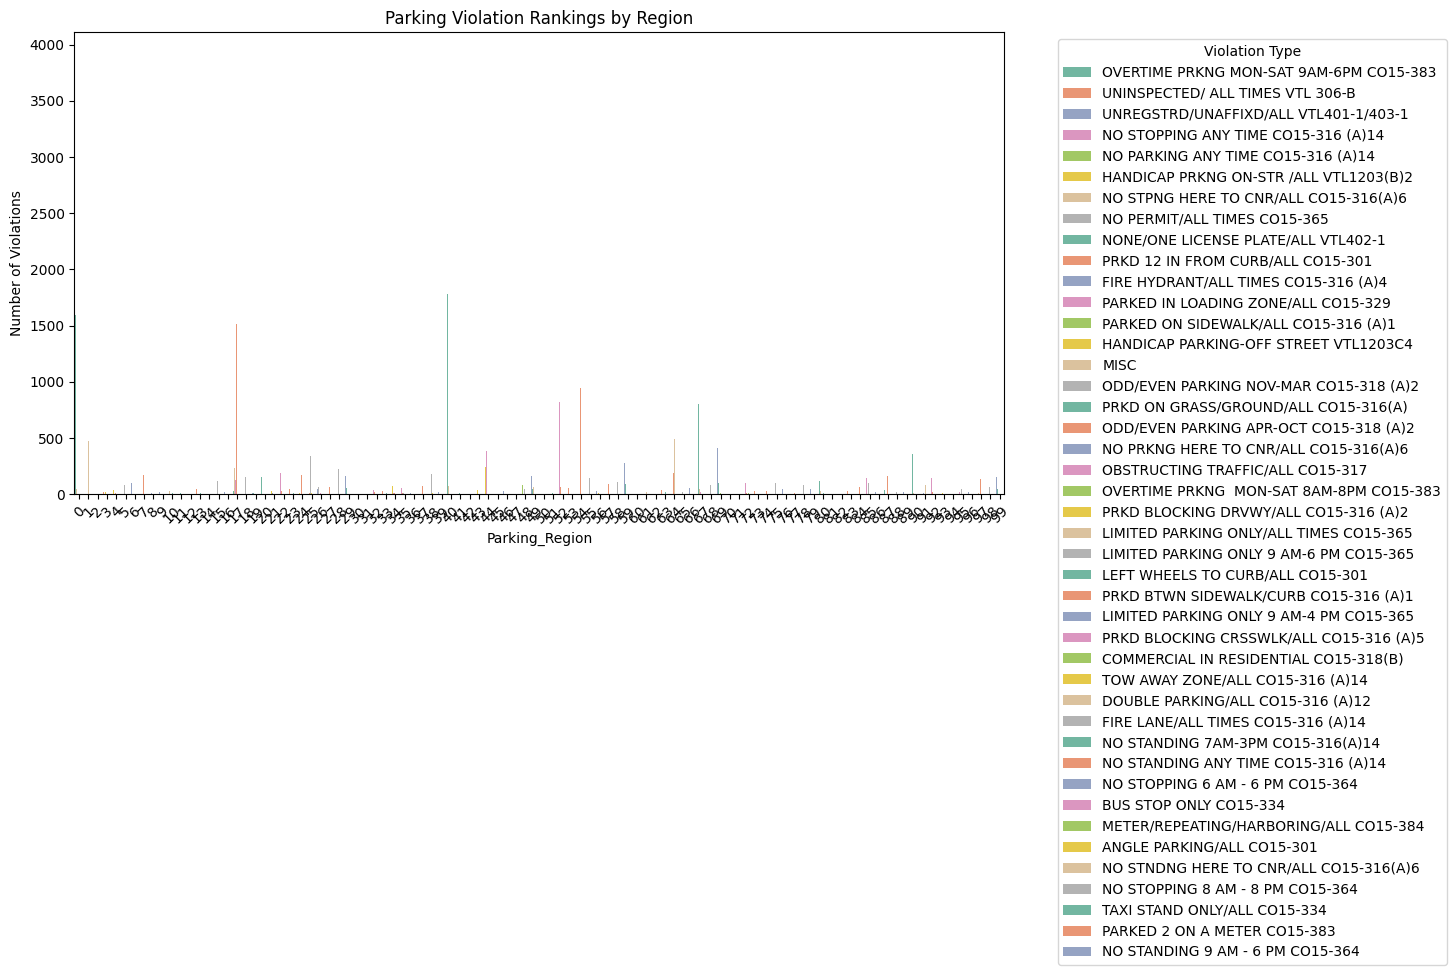

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("parking.csv")

# Drop missing values for essential columns
data = data.dropna(subset=['X', 'Y', 'description']).reset_index(drop=True)

# Apply K-Means clustering to divide into 10 regions (if not already defined)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=100, random_state=42, n_init=100)
data["Parking_Region"] = kmeans.fit_predict(data[['X', 'Y']])

# Count occurrences of each violation type per region
violation_counts = data.groupby(["Parking_Region", "description"]).size().reset_index(name="Count")

# Sort violations in each region by frequency
violation_counts = violation_counts.sort_values(by=["Parking_Region", "Count"], ascending=[True, False])

# Plot violation distribution by region
plt.figure(figsize=(12, 6))
sns.barplot(x="Parking_Region", y="Count", hue="description", data=violation_counts, palette="Set2")
plt.xlabel("Parking_Region")
plt.ylabel("Number of Violations")
plt.title("Parking Violation Rankings by Region")
plt.legend(title="Violation Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.show()




# plt.figure(figsize=(10, 6))
# scatter = plt.scatter(df["X"], df["Y"], c=df["Region"], cmap="tab10", alpha=0.7)
# plt.colorbar(scatter, label="Region")
# plt.xlabel("X Coordinate")
# plt.ylabel("Y Coordinate")
# plt.title("Dividing X, Y into 10 Arbitrary Regions")
# plt.show()





In [171]:
# summary_counts = df2['description'].value_counts()

# summary_counts.to_dict()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("parking.csv")

# Drop rows with missing coordinates
data = data.dropna(subset=['X', 'Y', 'description']).reset_index(drop=True)

# Apply K-Means clustering to divide into 10 regions (if not already defined)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
data["Parking_Region"] = kmeans.fit_predict(data[['X', 'Y']])

# Set figure size
plt.figure(figsize=(10, 6))

# Use a heatmap (kernel density estimation)
sns.kdeplot(
    x=data["X"], 
    y=data["Y"], 
    cmap="Reds", 
    fill=True, 
    bw_adjust=0.5, 
    levels=50  # More levels for a smoother gradient
)

# Scatter plot on top to show region centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            color="blue", marker="x", s=100, label="Region Centers")

plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Parking Violation Heatmap by Region")
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = pd.read_csv("parking.csv")

# Drop missing values
data = data.dropna(subset=['X', 'Y', 'description']).reset_index(drop=True)

# Extract input features (X, Y) and target (Violation_Type)
X = data[['X', 'Y']]
y = data['description']  # This should be categorical

# Convert Violation_Type to numerical labels if it's a string
y = y.astype('category').cat.codes

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN model (k=5)
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train_scaled, y_train)

# Make predictions on test data
y_pred = knn.predict(X_test_scaled)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Model Accuracy: {accuracy:.2f}")

# Predict violation type for a new location
new_location = np.array([[-73.96717075 , 40.68881835]])  # Example input

new_location_region = kmeans.predict(new_location)[0]  # Predict region for new input
print(f"New Location Assigned Region: {new_location_region}")


new_location_scaled = scaler.transform(new_location)
predicted_violation = knn.predict(new_location_scaled)

# Convert prediction back to original labels
predicted_violation_label = data['description'].astype('category').cat.categories[predicted_violation[0]]
print(f"Predicted Violation Type for given location: {predicted_violation_label}")


KNN Model Accuracy: 0.53
New Location Assigned Region: 14
Predicted Violation Type for given location: ODD/EVEN PARKING APR-OCT CO15-318 (A)2


c:\Users\seong\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
c:\Users\seong\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv("parking.csv")



# Select only valid rows with non-null X and Y
df = df[['X', 'Y']].dropna().reset_index(drop=True)  # Drop NaNs and reset index

# Apply K-Means clustering to divide into 10 regions
kmeans = KMeans(n_clusters=100, random_state=42, n_init=100)
df["Parking_Region"] = kmeans.fit_predict(df[['X', 'Y']])  # Fit only on existing rows

# Visualize the regions

df.to_excel("cityline_with_class.xlsx", index=False)

# Display first few rows with Region column
print(df.head(15))


dj = pd.read_csv("parking.csv")

dj = dj[['X', 'Y']].dropna().reset_index(drop=True) 

dj["Parking_Region"] = kmeans.fit_predict(dj[['X', 'Y']])


plt.figure(figsize=(10, 6))
scatter = plt.scatter(df["X"], df["Y"], c=df["Region"], cmap="tab10", alpha=0.7)
plt.colorbar(scatter, label="Region")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Dividing X, Y into 10 Arbitrary Regions")
plt.show()

In [170]:
# summary_counts = df2['location'].value_counts()

# summary_counts.to_dict()

In [ ]:
from geopy.geocoders import Nominatim
import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score



def get_coordinates(address):
    geolocator = Nominatim(user_agent="geo_converter")
    location = geolocator.geocode(address)

    if location:
        print(np.array([location.longitude, location.latitude]))
        return convert_region(location.longitude, location.latitude)  # (X, Y)
    else:
        return None
    

    
def convert_region(x_cord, y_cord):

    new_location = np.array([[x_cord, y_cord]])  
    new_location_region = kmeans.predict(new_location)[0]  # Predict region for new input
    print(f"New Location Assigned Region: {new_location_region}")

    

# Example usage
user_address = input("Enter a street address: ")
coords = get_coordinates(user_address)

if coords:
    print(f"Converted Coordinates (X, Y): {coords}")
else:
    print("Address not found!")



	




[-73.96717075  40.68881835]


NameError: name 'kmeans' is not defined

Accuracy of KNN Model: 0.51
Best k: 9, Best Accuracy: 0.52


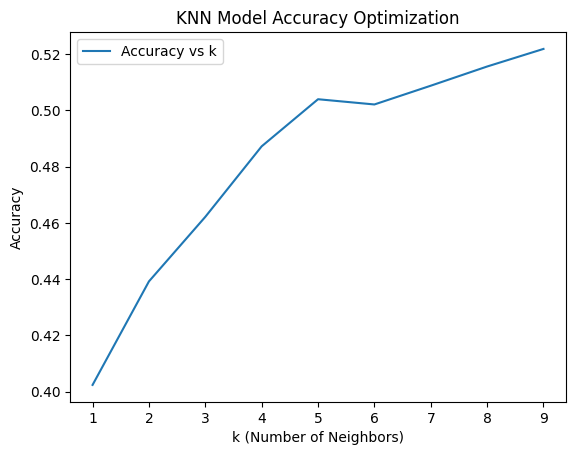

In [164]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from geopy.geocoders import Nominatim

# Load dataset
data = pd.read_csv("parking.csv")

# Drop missing values (Ensure 'X', 'Y', and 'Violation_Type' columns are not empty)
data = data.dropna(subset=['X', 'Y', "description"]).reset_index(drop=True)

# Step 1: Train KNN for Violation Prediction
X = data[['X', 'Y']]  # Features
y = data['description'].astype('category').cat.codes  # Target (converted to numerical)

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=300)
knn.fit(X_train_scaled, y_train)

# Step 2: Make Predictions
y_pred = knn.predict(X_test_scaled)

# Step 3: Check Accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of KNN Model: {accuracy:.2f}")




import matplotlib.pyplot as plt

accuracies = []
k_values = range(1, 10)  # Try k from 1 to 20
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

best_k = k_values[accuracies.index(max(accuracies))]
print(f"Best k: {best_k}, Best Accuracy: {max(accuracies):.2f}")

plt.plot(k_values, accuracies, label='Accuracy vs k')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('KNN Model Accuracy Optimization')
plt.legend()
plt.show()

